In [1]:
import pandas as pd
import numpy as np
from pandas import read_excel
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from calendar import day_abbr, month_abbr, mdays
import datetime
#from datetime import datetime
#from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight') # For plots

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
#Author: Vatsala

In [2]:
plot_file_path="../metImages/"

plot_data_path="../plotData/"

In [3]:
#****** Note: Data has been QC-ed

#read met Data to get the units of the different measurements
met_data = read_excel('../metData/FilteredMetData_MartoJun.xlsx', sheet_name='Sheet1', header=0)  #index_col=0, parse_dates=[0]    

In [4]:
met_data

,TIMESTAMP_1,PPFD_1_1_1,SWin_1_1_1,SWout_1_1_1,LWin_1_1_1,LWout_1_1_1,Rnet_1_1_1,G_1_1_1,G_2_1_1,Ta_1_1_1,...,TDT4_Ts_1_1_1,VWC_1_1_1,VWC_2_1_1,VWC_3_1_1,VWC_4_1_1,WaterLevel_1_1_1,SigStrength_1_1_1,AGC_1_1_1,TIMESTAMP_1_value,TIMESTAMP_1_rounded
0,2019-03-26 17:30:00,277.50,146.15,33.140,267.10,366.25,13.860,1.185082,2.853651,11.850,...,13.60,18.60,27.75,30.25,36.05,-9999,100.0,-9999,2019-03-26 17:30:00,2019-03-26 17:30:00
1,2019-03-27 08:30:00,220.75,102.00,20.010,336.25,355.50,62.740,3.637683,5.828328,7.262,...,7.10,19.05,27.50,30.20,35.60,-9999,100.0,-9999,2019-03-27 08:30:00,2019-03-27 08:30:00
2,2019-03-27 09:00:00,315.40,146.45,28.675,336.20,359.40,94.575,10.508773,12.427950,7.648,...,7.50,19.05,27.45,30.20,35.60,-9999,100.0,-9999,2019-03-27 09:00:00,2019-03-27 09:00:00
3,2019-03-27 09:30:00,480.00,224.30,43.875,336.10,367.35,149.175,20.978545,23.094235,8.465,...,8.05,19.10,27.40,30.05,35.65,-9999,100.0,-9999,2019-03-27 09:30:00,2019-03-27 09:30:00
4,2019-03-27 10:00:00,654.85,305.80,59.940,332.00,375.40,202.460,33.931725,36.153975,9.505,...,8.90,19.10,27.40,29.90,35.70,-9999,100.0,-9999,2019-03-27 10:00:00,2019-03-27 10:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898,2019-06-29 16:30:00,1164.50,504.80,115.050,374.70,495.45,269.000,65.701155,40.862270,31.500,...,26.15,12.85,19.40,21.20,25.70,-9999,100.0,-9999,2019-06-29 16:30:00,2019-06-29 16:30:00
1899,2019-06-29 17:00:00,823.95,342.45,79.025,381.35,484.10,160.675,57.373295,32.973335,30.495,...,25.50,12.85,19.35,20.65,25.55,-9999,100.0,-9999,2019-06-29 17:00:00,2019-06-29 17:00:00
1900,2019-06-29 17:30:00,791.45,332.35,78.870,388.65,479.85,162.280,51.097350,25.888895,29.665,...,24.85,12.90,19.30,20.50,25.45,-9999,100.0,-9999,2019-06-29 17:30:00,2019-06-29 17:30:00
1901,2019-06-29 18:00:00,619.30,265.35,64.520,383.90,473.50,111.230,54.196140,25.310395,29.125,...,24.30,12.85,19.30,20.65,25.40,-9999,100.0,-9999,2019-06-29 18:00:00,2019-06-29 18:00:00


In [5]:
#Drop the first row from the dataset
met_data.drop(met_data.index[0], inplace=True)  #with inplace=True, we do not need to reassign the statement to the dataframe

#set the index of data to Timestamp
met_data.set_index('TIMESTAMP_1', inplace=True)


In [6]:
met_data

,PPFD_1_1_1,SWin_1_1_1,SWout_1_1_1,LWin_1_1_1,LWout_1_1_1,Rnet_1_1_1,G_1_1_1,G_2_1_1,Ta_1_1_1,RH_1_1_1,...,TDT4_Ts_1_1_1,VWC_1_1_1,VWC_2_1_1,VWC_3_1_1,VWC_4_1_1,WaterLevel_1_1_1,SigStrength_1_1_1,AGC_1_1_1,TIMESTAMP_1_value,TIMESTAMP_1_rounded
TIMESTAMP_1,,,,,,,,,,,,,,,,,,,,,
2019-03-27 08:30:00,220.75,102.00,20.010,336.25,355.50,62.740,3.637683,5.828328,7.262,78.595,...,7.10,19.05,27.50,30.20,35.60,-9999,100.0,-9999,2019-03-27 08:30:00,2019-03-27 08:30:00
2019-03-27 09:00:00,315.40,146.45,28.675,336.20,359.40,94.575,10.508773,12.427950,7.648,77.565,...,7.50,19.05,27.45,30.20,35.60,-9999,100.0,-9999,2019-03-27 09:00:00,2019-03-27 09:00:00
2019-03-27 09:30:00,480.00,224.30,43.875,336.10,367.35,149.175,20.978545,23.094235,8.465,75.635,...,8.05,19.10,27.40,30.05,35.65,-9999,100.0,-9999,2019-03-27 09:30:00,2019-03-27 09:30:00
2019-03-27 10:00:00,654.85,305.80,59.940,332.00,375.40,202.460,33.931725,36.153975,9.505,71.990,...,8.90,19.10,27.40,29.90,35.70,-9999,100.0,-9999,2019-03-27 10:00:00,2019-03-27 10:00:00
2019-03-27 10:30:00,674.30,321.25,63.315,336.35,379.30,214.985,46.846715,48.785345,10.370,66.060,...,9.85,19.15,27.40,29.90,35.70,-9999,100.0,-9999,2019-03-27 10:30:00,2019-03-27 10:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-29 16:30:00,1164.50,504.80,115.050,374.70,495.45,269.000,65.701155,40.862270,31.500,32.120,...,26.15,12.85,19.40,21.20,25.70,-9999,100.0,-9999,2019-06-29 16:30:00,2019-06-29 16:30:00
2019-06-29 17:00:00,823.95,342.45,79.025,381.35,484.10,160.675,57.373295,32.973335,30.495,35.845,...,25.50,12.85,19.35,20.65,25.55,-9999,100.0,-9999,2019-06-29 17:00:00,2019-06-29 17:00:00
2019-06-29 17:30:00,791.45,332.35,78.870,388.65,479.85,162.280,51.097350,25.888895,29.665,39.420,...,24.85,12.90,19.30,20.50,25.45,-9999,100.0,-9999,2019-06-29 17:30:00,2019-06-29 17:30:00


### Read Met Data Units

In [7]:
metdata_unit = read_excel('../metData/MetDataUnits.xlsx', sheet_name='Sheet1', header=1)  

metdata_unit.columns = ['Met_Parameter', 'metUnit']

metdata_unit.set_index('Met_Parameter', inplace=True)

metdata_unit

,metUnit
Met_Parameter,
PPFD_1_1_1,umol+1m-2s-1
SWin_1_1_1,W+1m-2
SWout_1_1_1,W+1m-2
LWin_1_1_1,W+1m-2
LWout_1_1_1,W+1m-2
Rnet_1_1_1,W+1m-2
G_1_1_1,W+1m-2
G_2_1_1,W+1m-2
Ta_1_1_1,C


In [8]:
metdata_unit.at['PPFD_1_1_1','metUnit']

'umol+1m-2s-1'

In [9]:
#Filter the dataframe to consider only a date range - applicable to the plots
met_data = met_data[(met_data.index >= '2019-03-26 17:26:00') & (met_data.index <= '2019-06-30 02:17:00')]

In [10]:
met_data

,PPFD_1_1_1,SWin_1_1_1,SWout_1_1_1,LWin_1_1_1,LWout_1_1_1,Rnet_1_1_1,G_1_1_1,G_2_1_1,Ta_1_1_1,RH_1_1_1,...,TDT4_Ts_1_1_1,VWC_1_1_1,VWC_2_1_1,VWC_3_1_1,VWC_4_1_1,WaterLevel_1_1_1,SigStrength_1_1_1,AGC_1_1_1,TIMESTAMP_1_value,TIMESTAMP_1_rounded
TIMESTAMP_1,,,,,,,,,,,,,,,,,,,,,
2019-03-27 08:30:00,220.75,102.00,20.010,336.25,355.50,62.740,3.637683,5.828328,7.262,78.595,...,7.10,19.05,27.50,30.20,35.60,-9999,100.0,-9999,2019-03-27 08:30:00,2019-03-27 08:30:00
2019-03-27 09:00:00,315.40,146.45,28.675,336.20,359.40,94.575,10.508773,12.427950,7.648,77.565,...,7.50,19.05,27.45,30.20,35.60,-9999,100.0,-9999,2019-03-27 09:00:00,2019-03-27 09:00:00
2019-03-27 09:30:00,480.00,224.30,43.875,336.10,367.35,149.175,20.978545,23.094235,8.465,75.635,...,8.05,19.10,27.40,30.05,35.65,-9999,100.0,-9999,2019-03-27 09:30:00,2019-03-27 09:30:00
2019-03-27 10:00:00,654.85,305.80,59.940,332.00,375.40,202.460,33.931725,36.153975,9.505,71.990,...,8.90,19.10,27.40,29.90,35.70,-9999,100.0,-9999,2019-03-27 10:00:00,2019-03-27 10:00:00
2019-03-27 10:30:00,674.30,321.25,63.315,336.35,379.30,214.985,46.846715,48.785345,10.370,66.060,...,9.85,19.15,27.40,29.90,35.70,-9999,100.0,-9999,2019-03-27 10:30:00,2019-03-27 10:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-29 16:30:00,1164.50,504.80,115.050,374.70,495.45,269.000,65.701155,40.862270,31.500,32.120,...,26.15,12.85,19.40,21.20,25.70,-9999,100.0,-9999,2019-06-29 16:30:00,2019-06-29 16:30:00
2019-06-29 17:00:00,823.95,342.45,79.025,381.35,484.10,160.675,57.373295,32.973335,30.495,35.845,...,25.50,12.85,19.35,20.65,25.55,-9999,100.0,-9999,2019-06-29 17:00:00,2019-06-29 17:00:00
2019-06-29 17:30:00,791.45,332.35,78.870,388.65,479.85,162.280,51.097350,25.888895,29.665,39.420,...,24.85,12.90,19.30,20.50,25.45,-9999,100.0,-9999,2019-06-29 17:30:00,2019-06-29 17:30:00


In [11]:
#from datetime import datetime, timedelta

x = datetime.datetime(2020, 5, 17, 16, 36) 


def hour_rounder(t):
    # Rounds to nearest hour by adding a timedelta hour if minute >= 30
    return (t.replace(second=0, microsecond=0, minute=0, hour=t.hour)
               +datetime.timedelta(hours=t.minute//30))

print(x)
print(hour_rounder(x))


2020-05-17 16:36:00
2020-05-17 17:00:00


In [12]:
#from datetime import datetime, timedelta

x = datetime.datetime(2020, 5, 17, 16, 36) 


def hour_rounder(t):
    # Rounds to nearest hour by adding a timedelta hour if minute >= 30
    return (t.replace(second=0, microsecond=0, minute=0, hour=t.hour)
               +datetime.timedelta(minutes=15*(t.minute // 15)))

print(x)
print(hour_rounder(x))


2020-05-17 16:36:00
2020-05-17 16:30:00


### Round the timestamp value to nearest 30 min

In [13]:
#test round function from dt

met_data1 = met_data.copy()
met_data1['TIMESTAMP_1_value'] = met_data1.index

#round the timestamp value to nearest quarter
#met_data1['TIMESTAMP_1_rounded'] = met_data1['TIMESTAMP_1_value'].dt.round('15min')

#round the timestamp value to nearest half hour
met_data1['TIMESTAMP_1_rounded'] = met_data1['TIMESTAMP_1_value'].dt.round('30min')

#Drop the column Timestamp - the rounded Timestamp value will be used for plotting
#met_data1.drop('TIMESTAMP_1_value', axis=1, inplace=True)

met_data1

,PPFD_1_1_1,SWin_1_1_1,SWout_1_1_1,LWin_1_1_1,LWout_1_1_1,Rnet_1_1_1,G_1_1_1,G_2_1_1,Ta_1_1_1,RH_1_1_1,...,TDT4_Ts_1_1_1,VWC_1_1_1,VWC_2_1_1,VWC_3_1_1,VWC_4_1_1,WaterLevel_1_1_1,SigStrength_1_1_1,AGC_1_1_1,TIMESTAMP_1_value,TIMESTAMP_1_rounded
TIMESTAMP_1,,,,,,,,,,,,,,,,,,,,,
2019-03-27 08:30:00,220.75,102.00,20.010,336.25,355.50,62.740,3.637683,5.828328,7.262,78.595,...,7.10,19.05,27.50,30.20,35.60,-9999,100.0,-9999,2019-03-27 08:30:00,2019-03-27 08:30:00
2019-03-27 09:00:00,315.40,146.45,28.675,336.20,359.40,94.575,10.508773,12.427950,7.648,77.565,...,7.50,19.05,27.45,30.20,35.60,-9999,100.0,-9999,2019-03-27 09:00:00,2019-03-27 09:00:00
2019-03-27 09:30:00,480.00,224.30,43.875,336.10,367.35,149.175,20.978545,23.094235,8.465,75.635,...,8.05,19.10,27.40,30.05,35.65,-9999,100.0,-9999,2019-03-27 09:30:00,2019-03-27 09:30:00
2019-03-27 10:00:00,654.85,305.80,59.940,332.00,375.40,202.460,33.931725,36.153975,9.505,71.990,...,8.90,19.10,27.40,29.90,35.70,-9999,100.0,-9999,2019-03-27 10:00:00,2019-03-27 10:00:00
2019-03-27 10:30:00,674.30,321.25,63.315,336.35,379.30,214.985,46.846715,48.785345,10.370,66.060,...,9.85,19.15,27.40,29.90,35.70,-9999,100.0,-9999,2019-03-27 10:30:00,2019-03-27 10:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-29 16:30:00,1164.50,504.80,115.050,374.70,495.45,269.000,65.701155,40.862270,31.500,32.120,...,26.15,12.85,19.40,21.20,25.70,-9999,100.0,-9999,2019-06-29 16:30:00,2019-06-29 16:30:00
2019-06-29 17:00:00,823.95,342.45,79.025,381.35,484.10,160.675,57.373295,32.973335,30.495,35.845,...,25.50,12.85,19.35,20.65,25.55,-9999,100.0,-9999,2019-06-29 17:00:00,2019-06-29 17:00:00
2019-06-29 17:30:00,791.45,332.35,78.870,388.65,479.85,162.280,51.097350,25.888895,29.665,39.420,...,24.85,12.90,19.30,20.50,25.45,-9999,100.0,-9999,2019-06-29 17:30:00,2019-06-29 17:30:00


In [14]:
#how to query a dataframe bwtween 2 dates
start_date = pd.to_datetime('3/26/2019 00:00')
end_date   = pd.to_datetime('4/1/2019 00:00')

print(met_data1.loc[(met_data1['TIMESTAMP_1_rounded'] > start_date) & (met_data1['TIMESTAMP_1_rounded'] < end_date)])

                     PPFD_1_1_1  SWin_1_1_1  SWout_1_1_1  LWin_1_1_1  \
TIMESTAMP_1                                                            
2019-03-27 08:30:00      220.75      102.00       20.010      336.25   
2019-03-27 09:00:00      315.40      146.45       28.675      336.20   
2019-03-27 09:30:00      480.00      224.30       43.875      336.10   
2019-03-27 10:00:00      654.85      305.80       59.940      332.00   
2019-03-27 10:30:00      674.30      321.25       63.315      336.35   
...                         ...         ...          ...         ...   
2019-03-31 14:30:00      914.00      435.85       89.120      310.55   
2019-03-31 15:00:00      653.05      318.55       64.765      332.30   
2019-03-31 15:30:00      518.80      250.10       50.920      326.55   
2019-03-31 16:00:00      661.70      324.05       69.565      303.85   
2019-03-31 17:00:00      360.90      173.60       37.410      292.70   

                     LWout_1_1_1  Rnet_1_1_1    G_1_1_1    G_2_

### Plot Met Data - Air Parameters
(Soil heat flux 1
Soil heat flux 2
Air temperature
Relative humidity
Atmospheric pressure
Total precipitation)

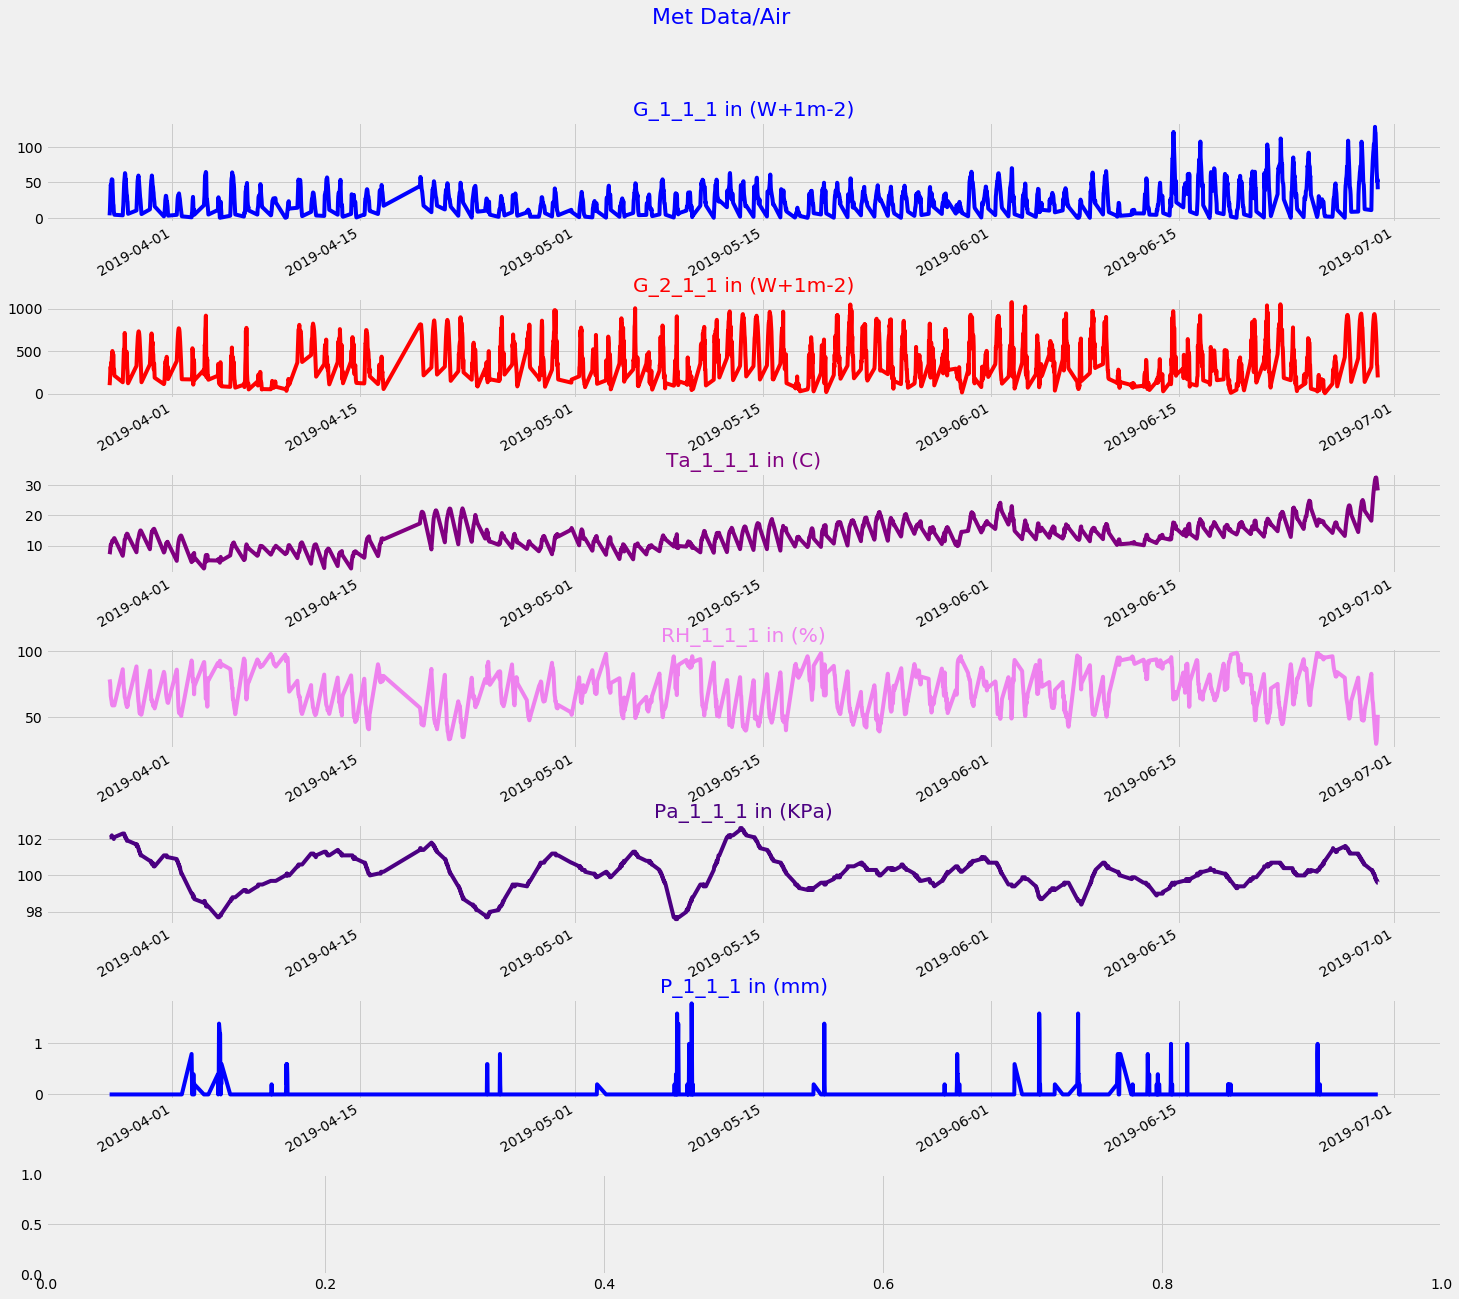

In [16]:
#Plot the merged dataframe   - Vertical Plot

#Plot the figures VERTICALLY
plt.rcParams["figure.figsize"] = (25, 20)
fig, axs = plt.subplots(7)
fig.suptitle('Met Data/Air', color = 'blue', size=22)
fig.tight_layout(pad=10.0)

unit = metdata_unit.at['G_1_1_1', 'metUnit']
axs[0].plot(met_data1.index, met_data1['G_1_1_1'],  color = 'blue')
axs[0].set_title('G_1_1_1'+' in ('+unit+')', color = 'blue')

unit = metdata_unit.at['G_2_1_1', 'metUnit']     
axs[1].plot(met_data1.index, met_data1['SWin_1_1_1'],  color = 'red')
axs[1].set_title('G_2_1_1'+' in ('+unit+')', color = 'red')

unit = metdata_unit.at['Ta_1_1_1', 'metUnit']
axs[2].plot(met_data1.index, met_data1['Ta_1_1_1'],  color = 'purple')
axs[2].set_title('Ta_1_1_1'+' in ('+unit+')', color = 'purple')

unit = metdata_unit.at['RH_1_1_1', 'metUnit'] 
axs[3].plot(met_data1.index, met_data1['RH_1_1_1'],  color = 'violet')
axs[3].set_title('RH_1_1_1'+' in ('+unit+')', color = 'violet')

unit = metdata_unit.at['Pa_1_1_1', 'metUnit']
axs[4].plot(met_data1.index, met_data1['Pa_1_1_1'],  color = 'indigo')
axs[4].set_title('Pa_1_1_1'+' in ('+unit+')', color = 'indigo')

unit = metdata_unit.at['P_1_1_1', 'metUnit']
axs[5].plot(met_data1.index, met_data1['P_1_1_1'],  color = 'blue')
axs[5].set_title('P_1_1_1'+' in ('+unit+')', color = 'blue')

plt.setp(axs[0].get_xticklabels() + axs[1].get_xticklabels() +
         axs[2].get_xticklabels() + axs[3].get_xticklabels() + axs[4].get_xticklabels() +
         axs[5].get_xticklabels(), rotation=30, ha='right')


plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.75)

#Save boxplot as a file
#output file name   
output_file_name = "MetData_Air_lineplot.png" 
plot_file_name   = plot_file_path + output_file_name

# save as png
plt.savefig(plot_file_name, dpi=50, bbox_inches='tight')

plt.show()

### Plot Met Data - Radiation Parameters
(Photosynthetic photon flux density
Shortwave incoming radiation
Shortwave outgoing radiation
Longwave incoming radiation
Longwave outgoing radiation
Net radiation)

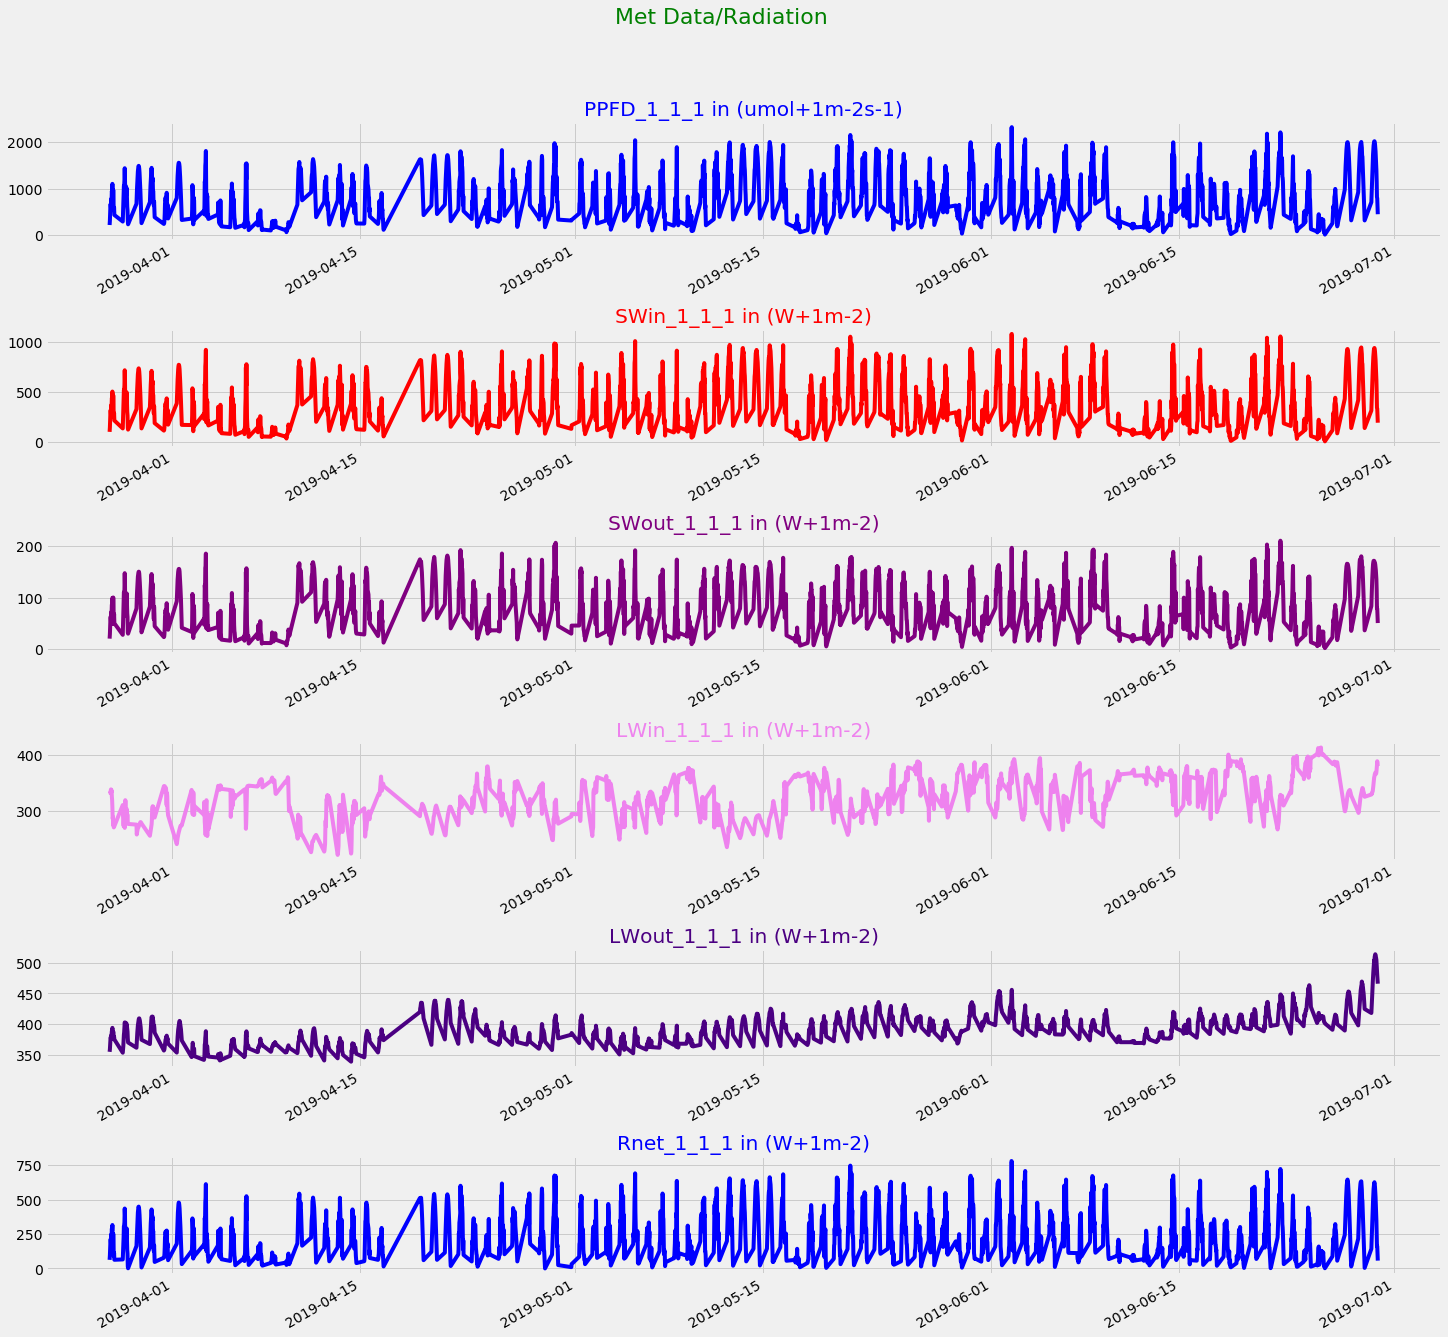

In [130]:
#Plot the merged dataframe   - Vertical Plot

#Plot the figures VERTICALLY
plt.rcParams["figure.figsize"] = (25, 20)
fig, axs = plt.subplots(6)
fig.suptitle('Met Data/Radiation', color = 'green', size=22)
fig.tight_layout(pad=10.0)

unit = metdata_unit.at['PPFD_1_1_1', 'metUnit'] 
axs[0].plot(met_data1.index, met_data1['PPFD_1_1_1'],  color = 'blue')
axs[0].set_title('PPFD_1_1_1'+' in ('+unit+')', color = 'blue')

unit = metdata_unit.at['SWin_1_1_1', 'metUnit']
axs[1].plot(met_data1.index, met_data1['SWin_1_1_1'],  color = 'red')
axs[1].set_title('SWin_1_1_1'+' in ('+unit+')', color = 'red')

unit = metdata_unit.at['SWout_1_1_1', 'metUnit']
axs[2].plot(met_data1.index, met_data1['SWout_1_1_1'],  color = 'purple')
axs[2].set_title('SWout_1_1_1'+' in ('+unit+')', color = 'purple')

unit = metdata_unit.at['LWin_1_1_1', 'metUnit']
axs[3].plot(met_data1.index, met_data1['LWin_1_1_1'],  color = 'violet')
axs[3].set_title('LWin_1_1_1'+' in ('+unit+')', color = 'violet')

unit = metdata_unit.at['LWout_1_1_1', 'metUnit']
axs[4].plot(met_data1.index, met_data1['LWout_1_1_1'],  color = 'indigo')
axs[4].set_title('LWout_1_1_1'+' in ('+unit+')', color = 'indigo')

unit = metdata_unit.at['Rnet_1_1_1', 'metUnit']
axs[5].plot(met_data1.index, met_data1['Rnet_1_1_1'],  color = 'blue')
axs[5].set_title('Rnet_1_1_1'+' in ('+unit+')', color = 'blue')

plt.setp(axs[0].get_xticklabels() + axs[1].get_xticklabels() +
         axs[2].get_xticklabels() + axs[3].get_xticklabels() + axs[4].get_xticklabels() +
         axs[5].get_xticklabels(), rotation=30, ha='right')


plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.75)

#Save boxplot as a file
#output file name   
output_file_name = "MetData_Radiation_lineplot.png" 
plot_file_name   = plot_file_path + output_file_name

# save as png
plt.savefig(plot_file_name, dpi=50, bbox_inches='tight')

plt.show()

### Plot Met Data - Soil Parameters (STP)
(Soil temperature @ 2cm
Soil temperature @ 5cm
Soil temperature @ 10cm
Soil temperature @ 20cm
Soil temperature @ 50cm)

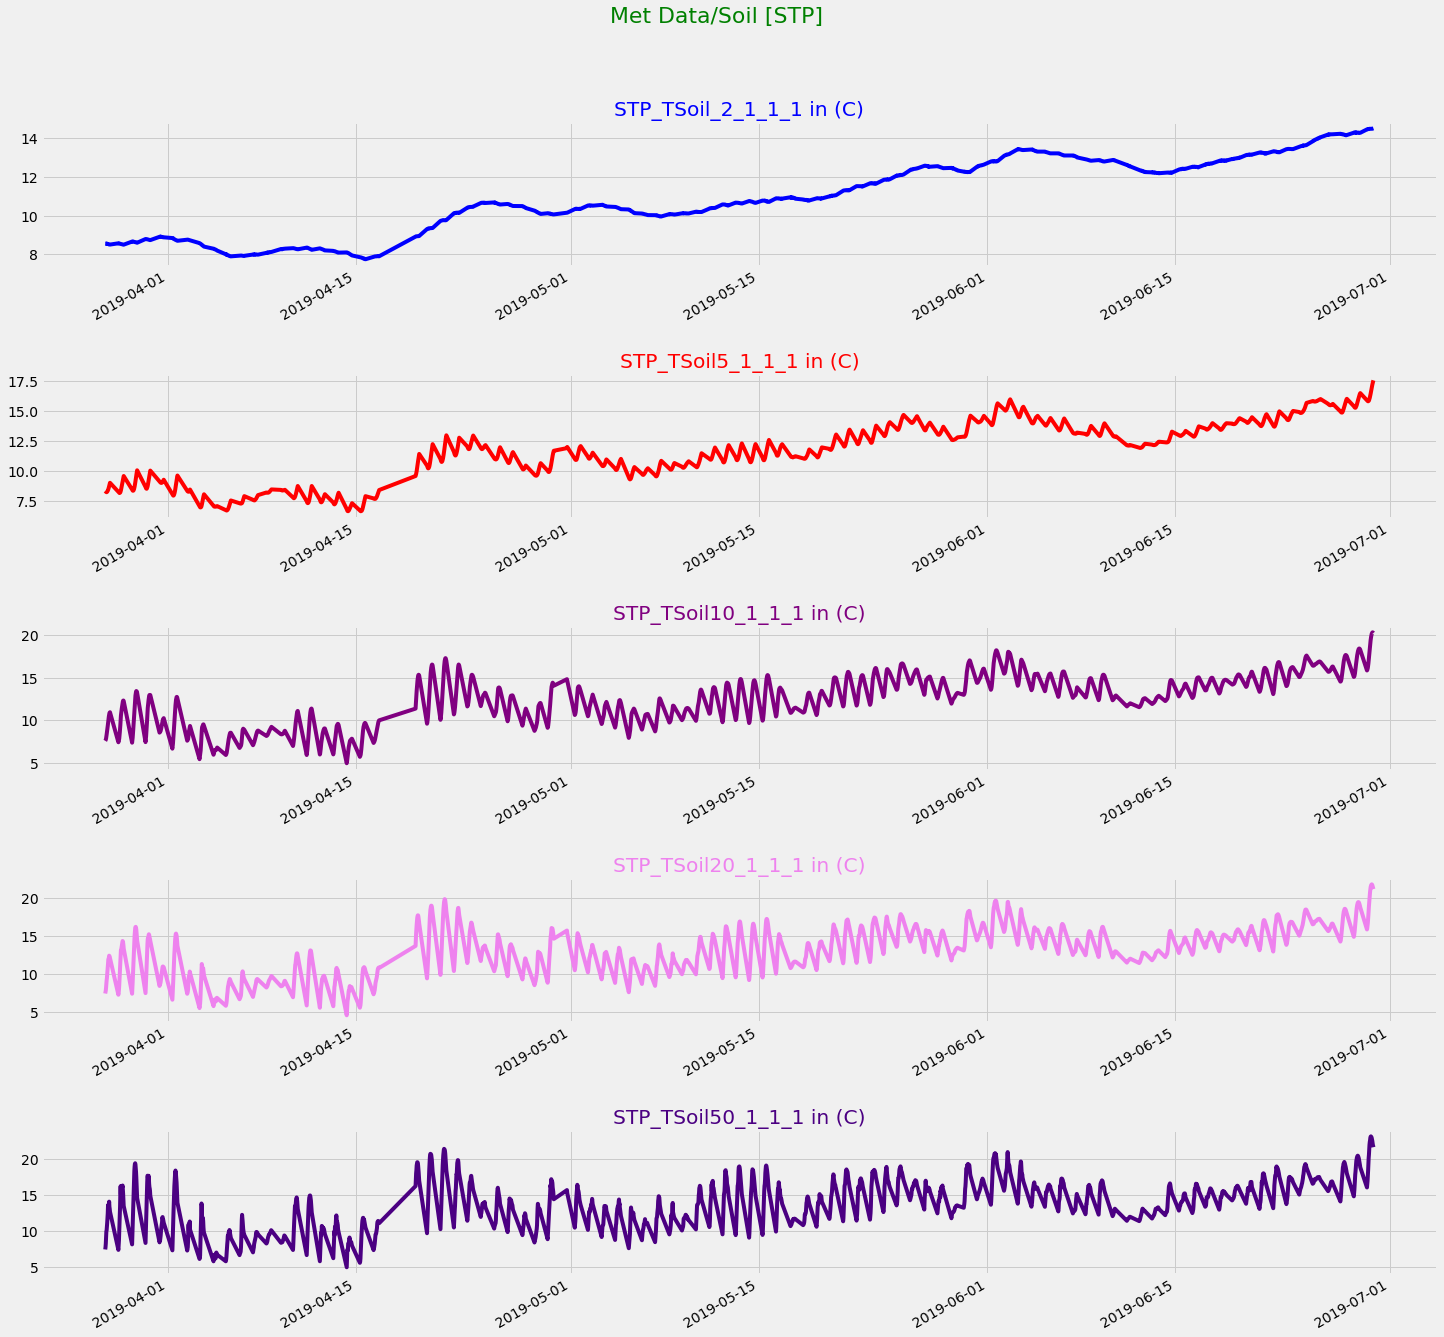

In [131]:
#Plot the merged dataframe   - Vertical Plot

#Plot the figures VERTICALLY
plt.rcParams["figure.figsize"] = (25, 20)
fig, axs = plt.subplots(5)
fig.suptitle('Met Data/Soil [STP]', color = 'green', size=22)
fig.tight_layout(pad=10.0)
 
unit = metdata_unit.at['STP_TSoil_2_1_1_1', 'metUnit'] 
axs[0].plot(met_data1.index, met_data1['STP_TSoil_2_1_1_1'],  color = 'blue')
axs[0].set_title('STP_TSoil_2_1_1_1'+' in ('+unit+')', color = 'blue')

unit = metdata_unit.at['STP_TSoil5_1_1_1', 'metUnit']
axs[1].plot(met_data1.index, met_data1['STP_TSoil5_1_1_1'],  color = 'red')
axs[1].set_title('STP_TSoil5_1_1_1'+' in ('+unit+')', color = 'red')

unit = metdata_unit.at['STP_TSoil10_1_1_1', 'metUnit']
axs[2].plot(met_data1.index, met_data1['STP_TSoil10_1_1_1'],  color = 'purple')
axs[2].set_title('STP_TSoil10_1_1_1'+' in ('+unit+')', color = 'purple')

unit = metdata_unit.at['STP_TSoil20_1_1_1', 'metUnit']
axs[3].plot(met_data1.index, met_data1['STP_TSoil20_1_1_1'],  color = 'violet')
axs[3].set_title('STP_TSoil20_1_1_1'+' in ('+unit+')', color = 'violet')

unit = metdata_unit.at['STP_TSoil50_1_1_1', 'metUnit']
axs[4].plot(met_data1.index, met_data1['STP_TSoil50_1_1_1'],  color = 'indigo')
axs[4].set_title('STP_TSoil50_1_1_1'+' in ('+unit+')', color = 'indigo')

plt.setp(axs[0].get_xticklabels() + axs[1].get_xticklabels() +
         axs[2].get_xticklabels() + axs[3].get_xticklabels() + axs[4].get_xticklabels(),
         rotation=30, ha='right')

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.75)

#Save boxplot as a file
#output file name   
output_file_name = "MetData_Soil_STP_lineplot.png" 
plot_file_name   = plot_file_path + output_file_name

# save as png
plt.savefig(plot_file_name, dpi=50, bbox_inches='tight')

plt.show()

### Plot Met Data - Soil Parameters (TDT)
(Soil temperature @ 5cm
Soil temperature @ 10cm
Soil temperature @ 15cm
Soil temperature @ 25cm)

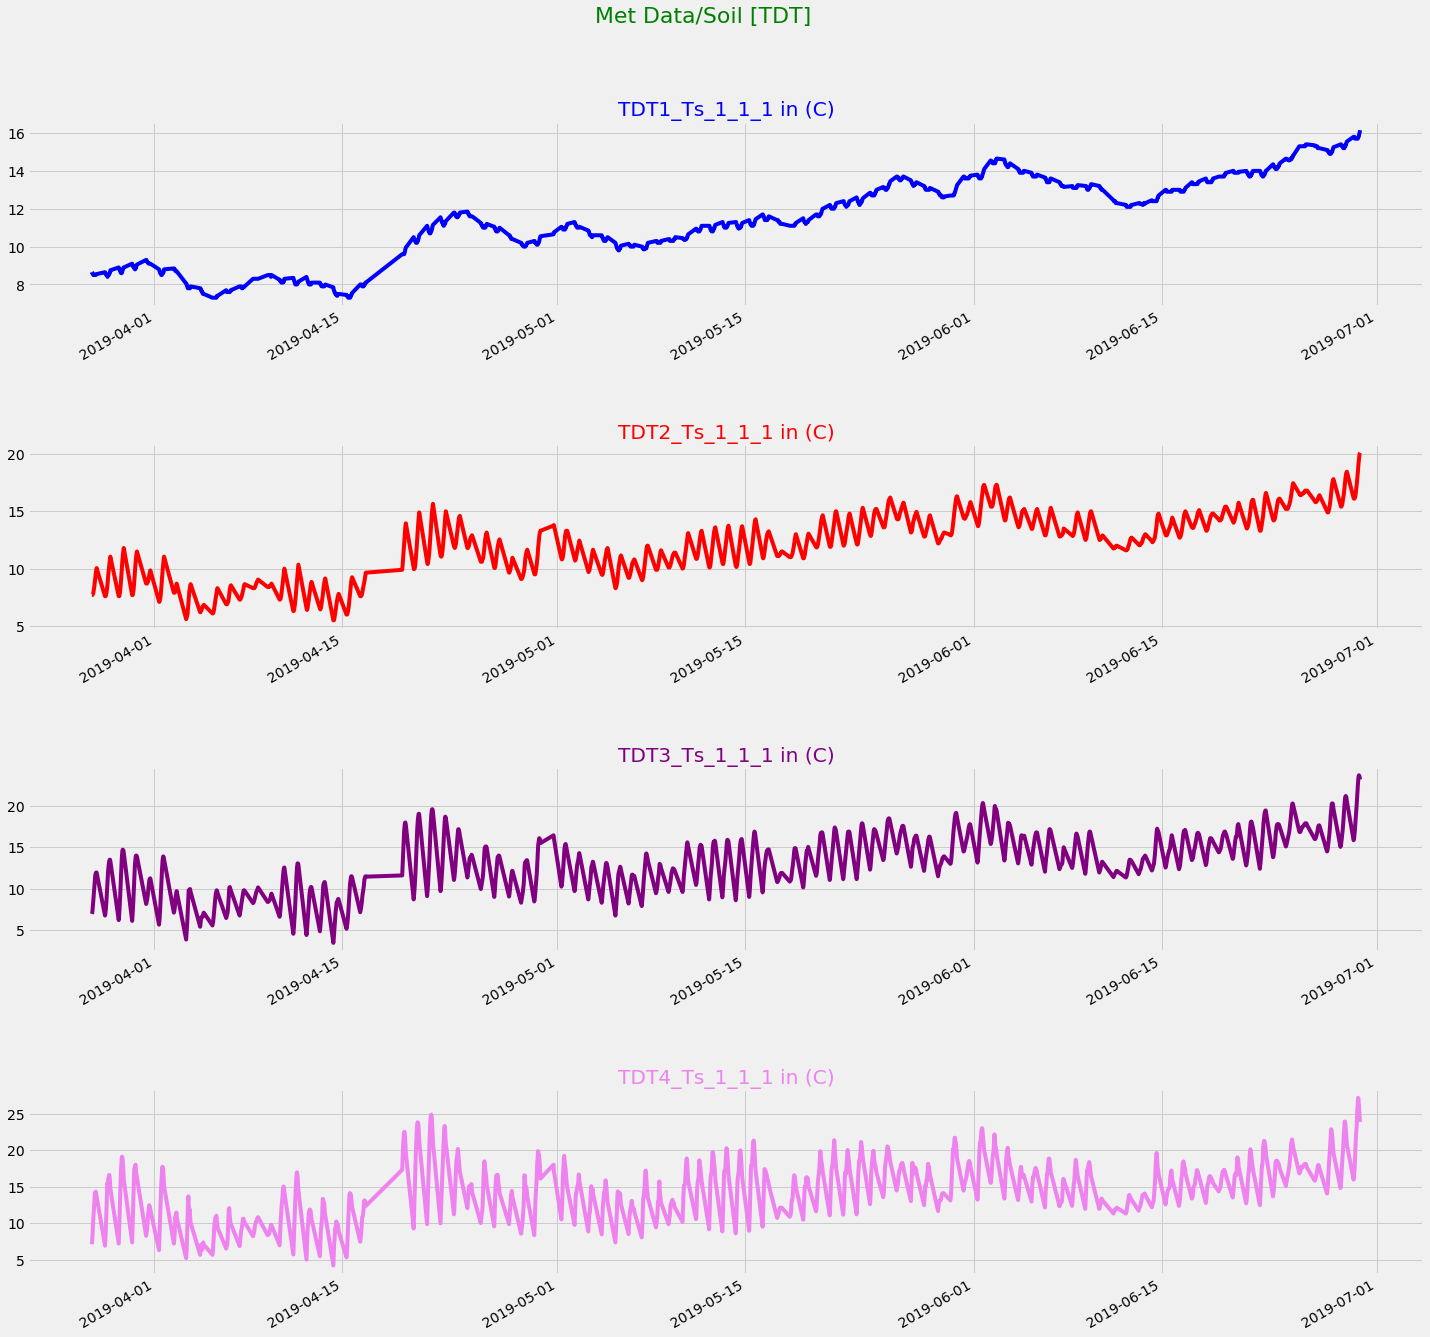

In [132]:
#Plot the merged dataframe   - Vertical Plot

#Plot the figures VERTICALLY
plt.rcParams["figure.figsize"] = (25, 20)
fig, axs = plt.subplots(4)
fig.suptitle('Met Data/Soil [TDT]', color = 'green', size=22)
fig.tight_layout(pad=10.0)

unit = metdata_unit.at['TDT1_Ts_1_1_1', 'metUnit'] 
axs[0].plot(met_data1.index, met_data1['TDT1_Ts_1_1_1'],  color = 'blue')
axs[0].set_title('TDT1_Ts_1_1_1'+' in ('+unit+')', color = 'blue')

unit = metdata_unit.at['TDT2_Ts_1_1_1', 'metUnit']
axs[1].plot(met_data1.index, met_data1['TDT2_Ts_1_1_1'],  color = 'red')
axs[1].set_title('TDT2_Ts_1_1_1'+' in ('+unit+')', color = 'red')

unit = metdata_unit.at['TDT3_Ts_1_1_1', 'metUnit']
axs[2].plot(met_data1.index, met_data1['TDT3_Ts_1_1_1'],  color = 'purple')
axs[2].set_title('TDT3_Ts_1_1_1'+' in ('+unit+')', color = 'purple')

unit = metdata_unit.at['TDT4_Ts_1_1_1', 'metUnit']
axs[3].plot(met_data1.index, met_data1['TDT4_Ts_1_1_1'],  color = 'violet')
axs[3].set_title('TDT4_Ts_1_1_1'+' in ('+unit+')', color = 'violet')


plt.setp(axs[0].get_xticklabels() + axs[1].get_xticklabels() +
         axs[2].get_xticklabels() + axs[3].get_xticklabels(),
         rotation=30, ha='right')

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.75)

#Save boxplot as a file
#output file name   
output_file_name = "MetData_Soil_TDT_lineplot.png" 
plot_file_name   = plot_file_path + output_file_name

# save as png
plt.savefig(plot_file_name, dpi=50, bbox_inches='tight')

plt.show()

### Plot Met Data - Volumetric Water Content (VWC)
(Volumetric water capacity @ 5cm
Volumetric water capacity @ 10cm
Volumetric water capacity @ 15cm
Volumetric water capacity @ 25cm
Water level)

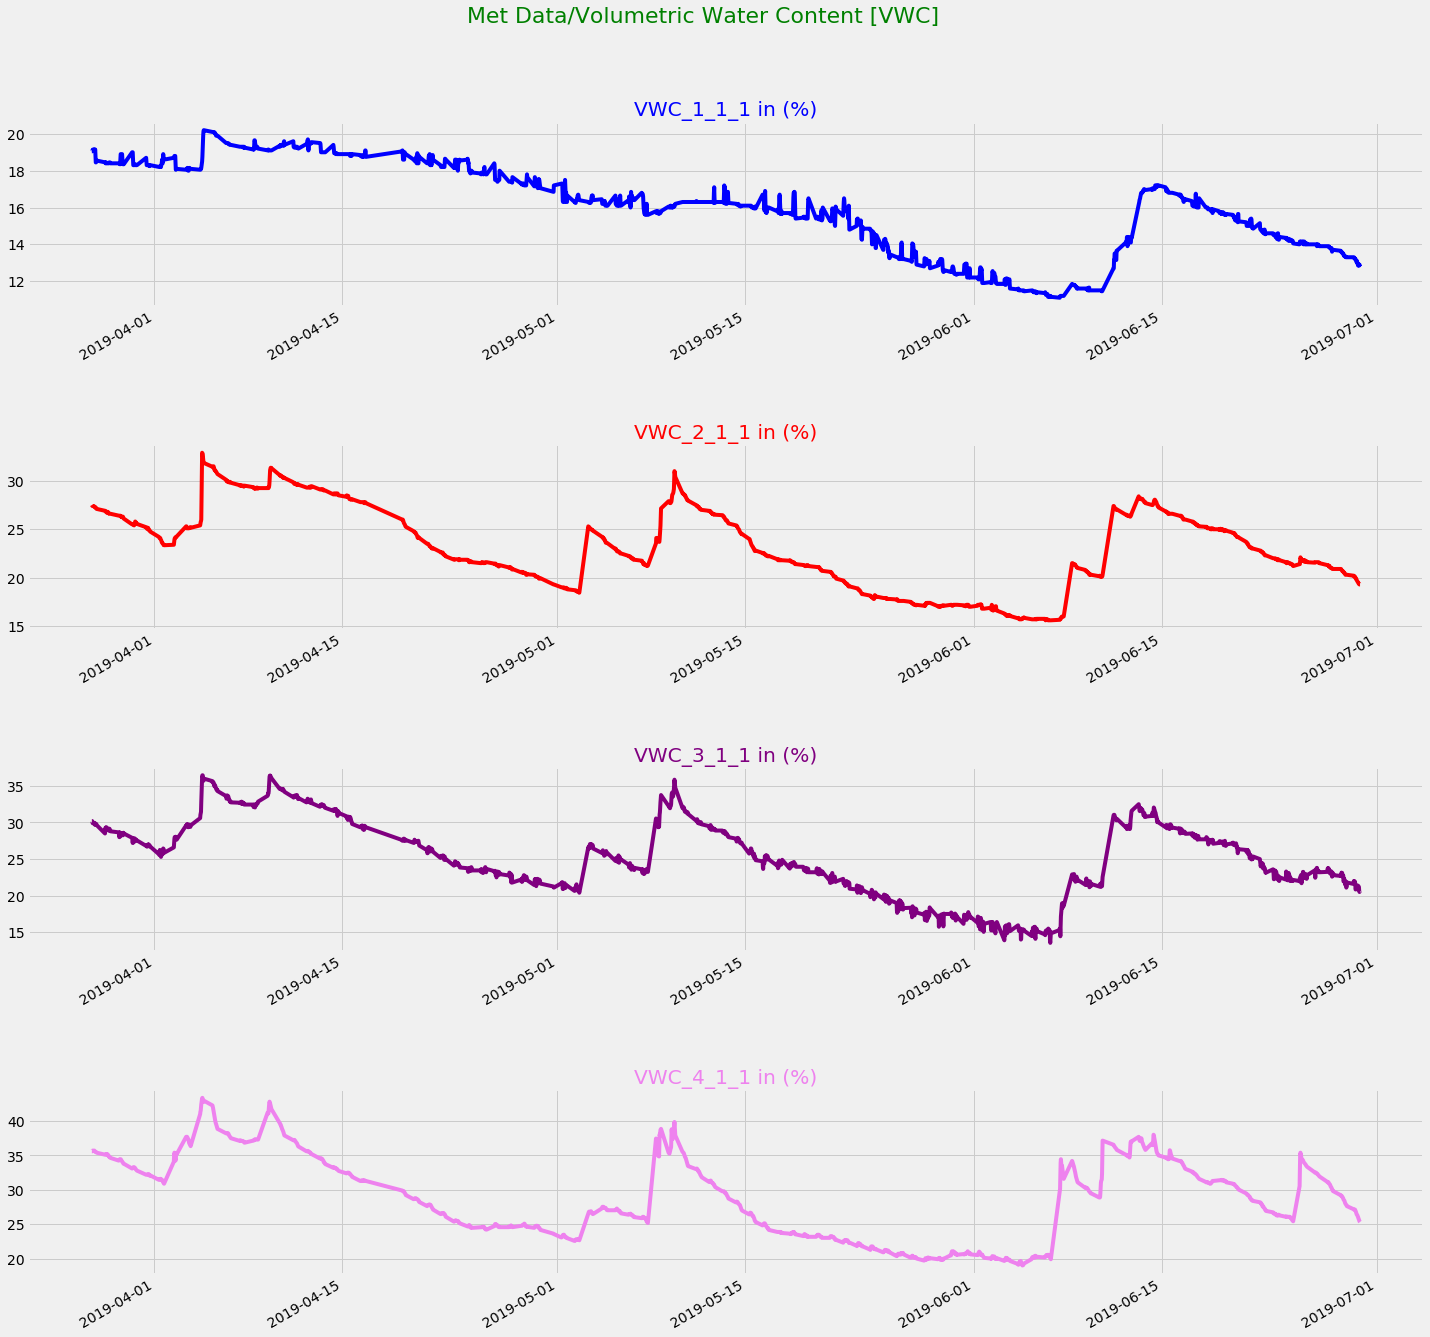

In [133]:
#Plot the merged dataframe   - Vertical Plot

#Plot the figures VERTICALLY
plt.rcParams["figure.figsize"] = (25, 20)
fig, axs = plt.subplots(4)
fig.suptitle('Met Data/Volumetric Water Content [VWC]', color = 'green', size=22)
fig.tight_layout(pad=10.0)

unit = metdata_unit.at['VWC_1_1_1', 'metUnit'] 
axs[0].plot(met_data1.index, met_data1['VWC_1_1_1'],  color = 'blue')
axs[0].set_title('VWC_1_1_1'+' in ('+unit+')', color = 'blue')

unit = metdata_unit.at['VWC_2_1_1', 'metUnit']
axs[1].plot(met_data1.index, met_data1['VWC_2_1_1'],  color = 'red')
axs[1].set_title('VWC_2_1_1'+' in ('+unit+')', color = 'red')

unit = metdata_unit.at['VWC_3_1_1', 'metUnit']
axs[2].plot(met_data1.index, met_data1['VWC_3_1_1'],  color = 'purple')
axs[2].set_title('VWC_3_1_1'+' in ('+unit+')', color = 'purple')

unit = metdata_unit.at['VWC_4_1_1', 'metUnit']
axs[3].plot(met_data1.index, met_data1['VWC_4_1_1'],  color = 'violet')
axs[3].set_title('VWC_4_1_1'+' in ('+unit+')', color = 'violet')

plt.setp(axs[0].get_xticklabels() + axs[1].get_xticklabels() +
         axs[2].get_xticklabels() + axs[3].get_xticklabels(),
         rotation=30, ha='right')

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.75)

#Save boxplot as a file
#output file name   
output_file_name = "MetData_VolumetricWaterContent_VWC_lineplot.png" 
plot_file_name   = plot_file_path + output_file_name

# save as png
plt.savefig(plot_file_name, dpi=50, bbox_inches='tight')

plt.show()